In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, log_loss
from sklearn import svm #support vector machines
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from functions import *

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load data

In [6]:
# load data, 
# not using a cleaning function
# dropping ingredients used in less than 0.00013 recipies

X, y, features = get_design_matrix(cleaning_function = clean, min_df = 3)

print("There are %d recipies and %d feautres" % (X.shape[0], len(features)))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# The set of different cuisines
data = pd.read_json('train.json')
cuisines = data.cuisine.unique()

There are 39774 recipies and 2176 feautres


## Make confusion matrices

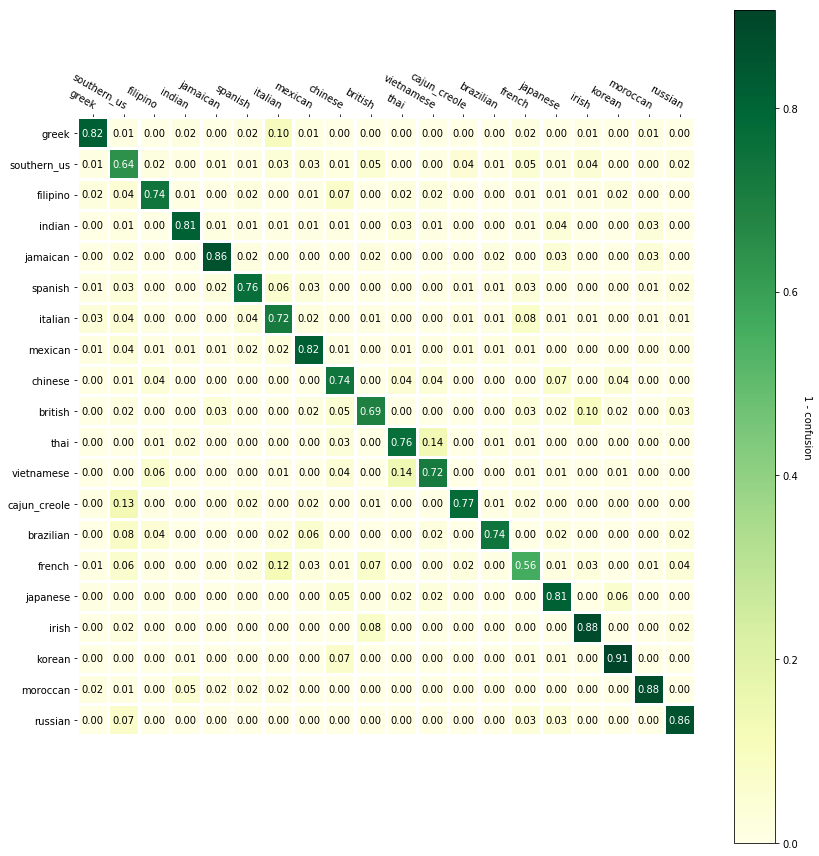

In [13]:
forrest_clf = RandomForestClassifier(n_estimators = 100, max_depth = None)
clf_confusion(forrest_clf, x_train, y_train, x_test, y_test, cuisines, size = (12,12), normalize = 'rows')

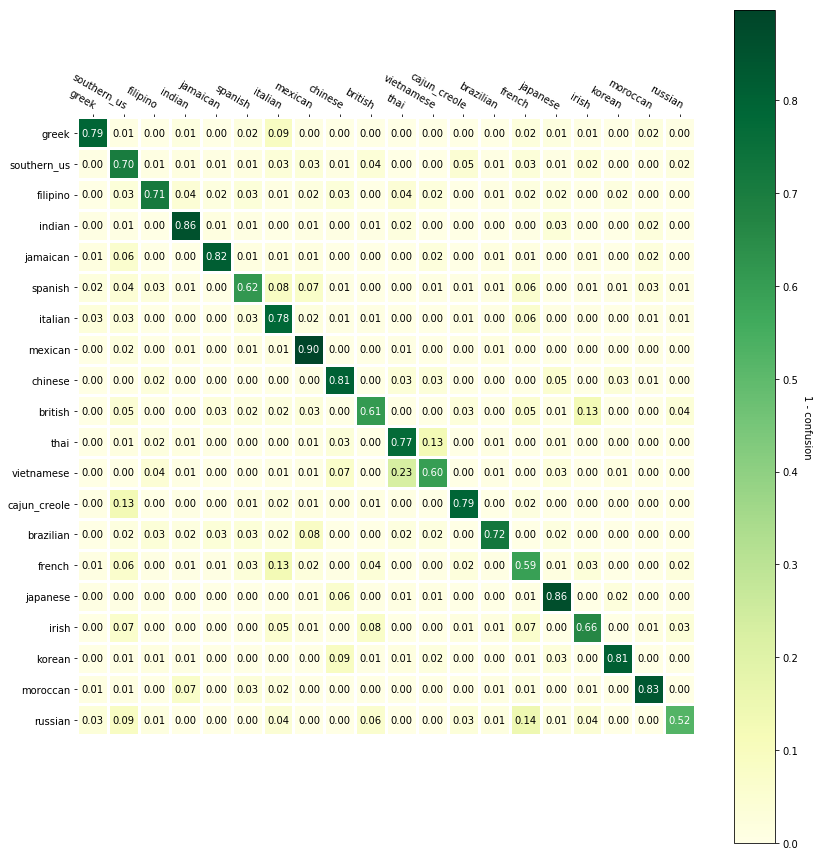

In [14]:
svm_clf =  svm.LinearSVC(C = 0.1)
clf_confusion(svm_clf, x_train, y_train, x_test, y_test, cuisines, size = (12,12), normalize = 'rows')

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


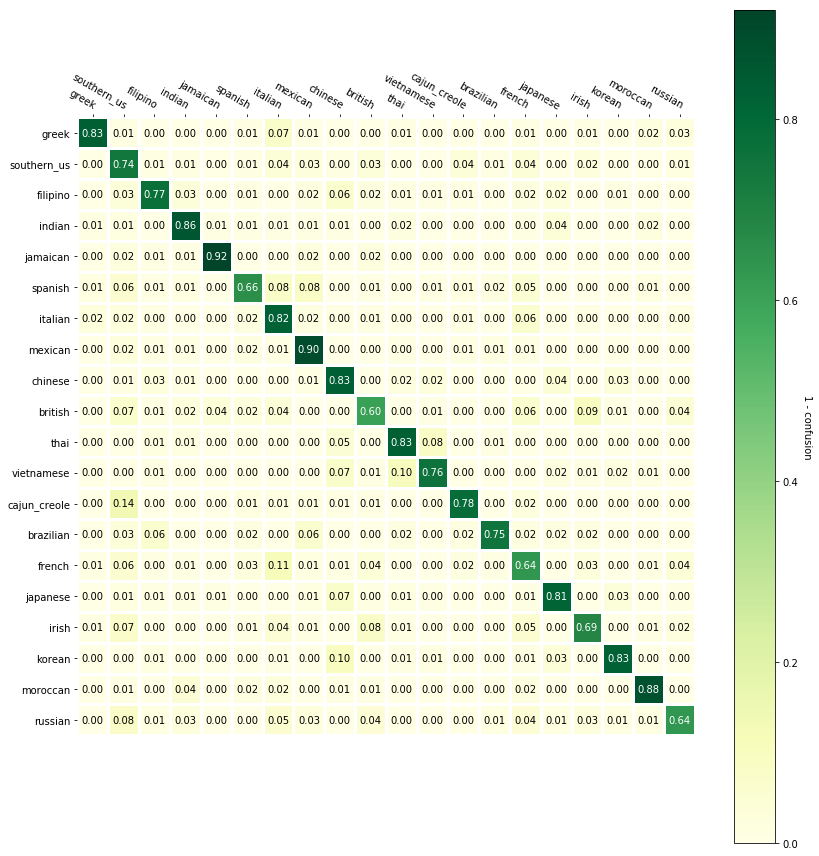

In [7]:
logistic_clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', C = 1)
forrest_clf = RandomForestClassifier(n_estimators = 100, max_depth = None)
mlp_clf = MLPClassifier(hidden_layer_sizes = (1000), alpha = 0.01, max_iter = 10)
clf = VotingClassifier(estimators=[('forrest', forrest_clf), ('mlp', mlp_clf), ('logistic', logistic_clf)],\
                                   voting='soft')
clf_confusion(clf, x_train, y_train, x_test, y_test, cuisines, size = (12,12), normalize = 'rows')